In [1]:
# Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Files to load from csv
file_train_summary=Path("Resources/Combined.csv")
file_housing=Path("Resources/cleaned_housing_data.csv")
train_df=pd.read_csv(file_train_summary)
housing_df=pd.read_csv(file_housing)
housing_df

,City Council_format2,Year,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales
0,Alpine Shire,2018,218,64,106,388
1,Alpine Shire,2019,214,44,69,327
2,Alpine Shire,2020,244,47,96,387
3,Alpine Shire,2021,252,65,72,389
4,Ararat Rural City,2018,209,22,25,256
...,...,...,...,...,...,...
315,Yarra Ranges Shire,2021,2324,563,195,3082
316,Yarriambiack Shire,2018,159,2,27,188
317,Yarriambiack Shire,2019,126,4,29,159
318,Yarriambiack Shire,2020,153,3,27,183


In [3]:
housing_df["City council"]=housing_df["City Council_format2"].replace({'Shire': 'S', 'City': 'C'}, regex=True)
housing_df["City council"]=housing_df["City council"]+"  "
housing_df=housing_df.merge(train_df, on="City council", how="left")
#Making csv file to check the contents
#housing_df.to_csv("check2.csv",index=False)
#Adding column to check if the city council has any train station
housing_df['With train'] = np.where(pd.isna(housing_df['Distance']), 'No', 'Yes')

housing_df=housing_df[['With train','City Council_format2', 'City council', 'Year', 'House Number of Sales','Unit/Apartment Number of Sales', 'Vacant House Number of Sales','Total Number of Sales']]
housing_df.to_csv("Resources/City_council_housing_data_2018_2021.csv",index=False)
housing_df

,With train,City Council_format2,City council,Year,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales
0,No,Alpine Shire,Alpine S,2018,218,64,106,388
1,No,Alpine Shire,Alpine S,2019,214,44,69,327
2,No,Alpine Shire,Alpine S,2020,244,47,96,387
3,No,Alpine Shire,Alpine S,2021,252,65,72,389
4,No,Ararat Rural City,Ararat Rural C,2018,209,22,25,256
...,...,...,...,...,...,...,...,...
315,Yes,Yarra Ranges Shire,Yarra Ranges S,2021,2324,563,195,3082
316,No,Yarriambiack Shire,Yarriambiack S,2018,159,2,27,188
317,No,Yarriambiack Shire,Yarriambiack S,2019,126,4,29,159
318,No,Yarriambiack Shire,Yarriambiack S,2020,153,3,27,183


In [4]:
map_df=housing_df.iloc[:,0:3]
housing_df.head()

map_df.reset_index(drop=True, inplace=True)
map_df.drop_duplicates(inplace=True)
map_df

,With train,City Council_format2,City council
0,No,Alpine Shire,Alpine S
4,No,Ararat Rural City,Ararat Rural C
8,No,Ballarat City,Ballarat C
12,Yes,Banyule City,Banyule C
16,No,Bass Coast Shire,Bass Coast S
...,...,...,...
300,No,Wodonga City,Wodonga C
304,Yes,Wyndham City,Wyndham C
308,Yes,Yarra City,Yarra C
312,Yes,Yarra Ranges Shire,Yarra Ranges S


In [5]:
housing_grouped=housing_df.groupby("City council")[["House Number of Sales","Unit/Apartment Number of Sales","Vacant House Number of Sales","Total Number of Sales"]].sum()
housing_grouped.reset_index(inplace=True)
housing_grouped=housing_grouped.merge(map_df, on="City council", how="left")
housing_grouped

,City council,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales,With train,City Council_format2
0,Alpine S,928,220,343,1491,No,Alpine Shire
1,Ararat Rural C,820,93,109,1022,No,Ararat Rural City
2,Ballarat C,9236,1918,6354,17508,No,Ballarat City
3,Banyule C,5178,3739,82,8999,Yes,Banyule City
4,Bass Coast S,4619,790,2756,8165,No,Bass Coast Shire
...,...,...,...,...,...,...,...
74,Wodonga C,3012,529,1575,5116,No,Wodonga City
75,Wyndham C,17202,1971,13954,33127,Yes,Wyndham City
76,Yarra C,3141,5262,8,8411,Yes,Yarra City
77,Yarra Ranges S,8151,1717,803,10671,Yes,Yarra Ranges Shire


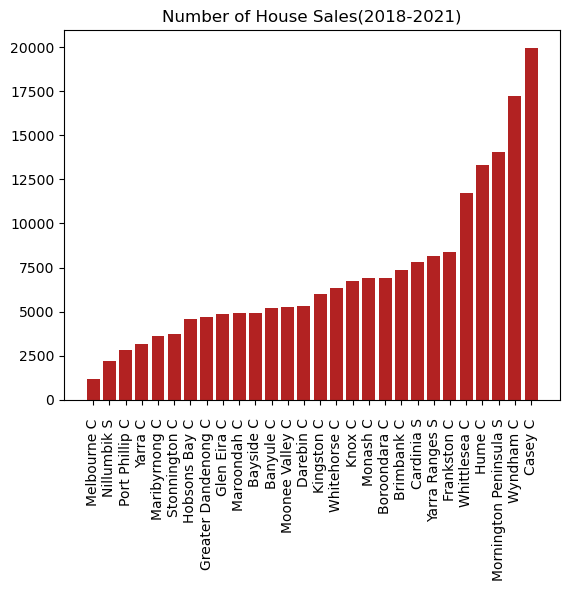

In [6]:
housing_grouped_train=housing_grouped.loc[housing_grouped["With train"]=="Yes"]
housing_grouped_train=housing_grouped_train.sort_values(by='House Number of Sales', ascending=True)
plt.bar(housing_grouped_train["City council"],housing_grouped_train["House Number of Sales"],color='firebrick')
plt.title("Number of House Sales(2018-2021)")
plt.xticks(rotation=90)
plt.show()

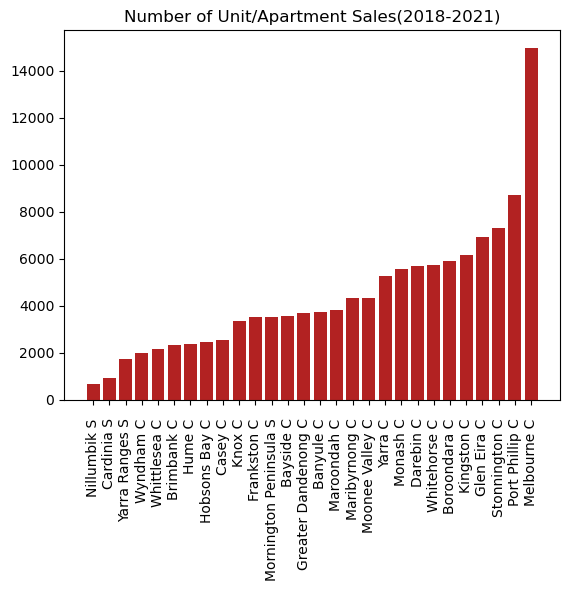

In [7]:
housing_grouped_train=housing_grouped.loc[housing_grouped["With train"]=="Yes"]
housing_grouped_train=housing_grouped_train.sort_values(by="Unit/Apartment Number of Sales", ascending=True)
plt.bar(housing_grouped_train["City council"],housing_grouped_train["Unit/Apartment Number of Sales"],color='firebrick')
plt.title("Number of Unit/Apartment Sales(2018-2021)")
plt.xticks(rotation=90)
plt.show()

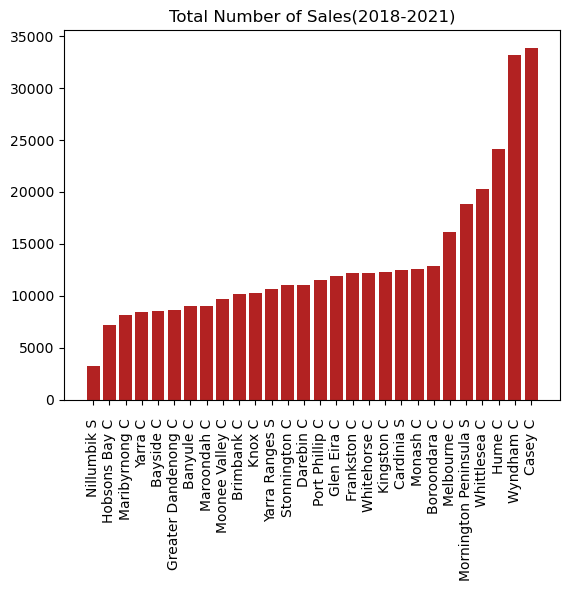

In [8]:
housing_grouped_train=housing_grouped.loc[housing_grouped["With train"]=="Yes"]
housing_grouped_train=housing_grouped_train.sort_values(by='Total Number of Sales', ascending=True)
plt.bar(housing_grouped_train["City council"],housing_grouped_train["Total Number of Sales"],color='firebrick')
plt.title("Total Number of Sales(2018-2021)")

plt.xticks(rotation=90)
plt.show()

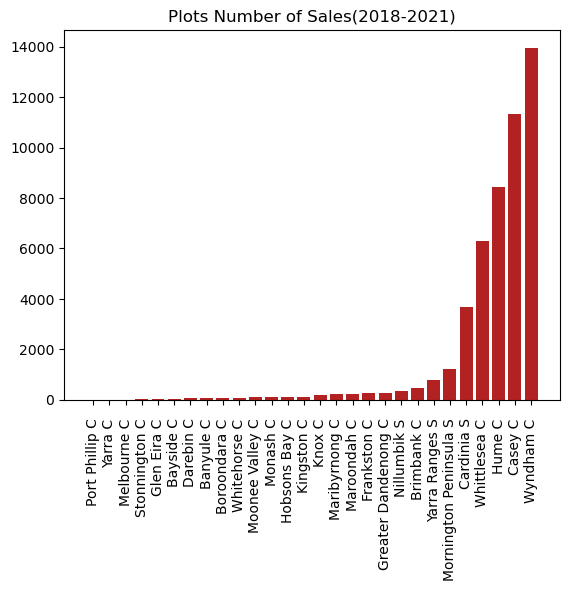

In [9]:
housing_grouped_train=housing_grouped.loc[housing_grouped["With train"]=="Yes"]
housing_grouped_train=housing_grouped_train.sort_values(by='Vacant House Number of Sales', ascending=True)
plt.bar(housing_grouped_train["City council"],housing_grouped_train["Vacant House Number of Sales"],color='firebrick')
plt.title("Plots Number of Sales(2018-2021)")

plt.xticks(rotation=90)
plt.show()

In [10]:
housing_grouped_train.columns

Index(['City council', 'House Number of Sales',
       'Unit/Apartment Number of Sales', 'Vacant House Number of Sales',
       'Total Number of Sales', 'With train', 'City Council_format2'],
      dtype='object')

In [11]:
train_df.columns

Index(['Unnamed: 0', 'City council', 'Distance', 'Stop_lat', 'Stop_long',
       'TotalAnnual', 'TotalAMPeak', 'TotalPMPeak', 'TotalWeekday',
       'TotalWeekend', 'TotalOffpeak', 'TotalIncrease(%)',
       'WeekdayIncrease(%)', 'AMIncrease(%)', 'PMIncrease(%)',
       'OffPeakIncrease(%)', 'WeekendIncrease(%)', 'Unit18', 'House18',
       'Plot18', 'Total18', 'Unit19', 'House19', 'Plot19', 'Total19', 'Unit20',
       'House20', 'Plot20', 'Total20', 'Unit21', 'House21', 'Plot21',
       'Total21', 'TotalUnit', 'TotalHouse', 'TotalPlot', 'Total'],
      dtype='object')

In [12]:
# #rename the "City Council" to "City council" in housing_grouped_train
# housing_grouped_train=housing_grouped_train.rename(columns={"City Council":"City council"})
# Merge the two dataframes on the "City council" column
merged_df = pd.merge(train_df, housing_grouped_train, on="City council", how="left")
merged_df


,Unnamed: 0,City council,Distance,Stop_lat,Stop_long,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,...,TotalUnit,TotalHouse,TotalPlot,Total,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales,With train,City Council_format2
0,0,Banyule C,13.392110,-37.737717,145.079519,16823150.0,26600.0,13450.0,59200.0,49850.0,...,3739,5178,82,8999,5178,3739,82,8999,Yes,Banyule City
1,1,Bayside C,14.183177,-37.938111,145.019598,19655550.0,28450.0,13250.0,63400.0,70800.0,...,3544,4944,42,8530,4944,3544,42,8530,Yes,Bayside City
2,2,Boroondara C,9.023778,-37.835384,145.066073,26341800.0,31350.0,33400.0,94000.0,74000.0,...,5905,6886,85,12876,6886,5905,85,12876,Yes,Boroondara City
3,3,Brimbank C,16.208247,-37.749828,144.805854,19624650.0,29200.0,10750.0,66650.0,60750.0,...,2317,7337,478,10132,7337,2317,478,10132,Yes,Brimbank City
4,4,Cardinia S,48.815247,-38.067220,145.425308,5640200.0,9100.0,3100.0,20550.0,14150.0,...,925,7831,3682,12438,7831,925,3682,12438,Yes,Cardinia Shire
5,5,Casey C,38.423380,-38.053639,145.285476,14640650.0,21750.0,8000.0,52900.0,38050.0,...,2543,19965,11347,33855,19965,2543,11347,33855,Yes,Casey City
6,6,Greater Dandenong C,24.980748,-37.968294,145.178908,18560600.0,20300.0,17550.0,63450.0,61500.0,...,3680,4690,280,8650,4690,3680,280,8650,Yes,Greater Dandenong City
7,7,Darebin C,8.325017,-37.751181,145.005097,22618650.0,33100.0,16400.0,75850.0,76200.0,...,5696,5299,53,11048,5299,5696,53,11048,Yes,Darebin City
8,8,Frankston C,37.594584,-38.130197,145.132306,6626350.0,6950.0,4300.0,21100.0,26250.0,...,3499,8378,263,12140,8378,3499,271,12148,Yes,Frankston City
9,9,Glen Eira C,10.860237,-37.897642,145.035702,24589800.0,31150.0,21350.0,82600.0,91750.0,...,6940,4890,40,11870,4890,6940,40,11870,Yes,Glen Eira City


In [13]:
merged_df.columns

Index(['Unnamed: 0', 'City council', 'Distance', 'Stop_lat', 'Stop_long',
       'TotalAnnual', 'TotalAMPeak', 'TotalPMPeak', 'TotalWeekday',
       'TotalWeekend', 'TotalOffpeak', 'TotalIncrease(%)',
       'WeekdayIncrease(%)', 'AMIncrease(%)', 'PMIncrease(%)',
       'OffPeakIncrease(%)', 'WeekendIncrease(%)', 'Unit18', 'House18',
       'Plot18', 'Total18', 'Unit19', 'House19', 'Plot19', 'Total19', 'Unit20',
       'House20', 'Plot20', 'Total20', 'Unit21', 'House21', 'Plot21',
       'Total21', 'TotalUnit', 'TotalHouse', 'TotalPlot', 'Total',
       'House Number of Sales', 'Unit/Apartment Number of Sales',
       'Vacant House Number of Sales', 'Total Number of Sales', 'With train',
       'City Council_format2'],
      dtype='object')

The correlation between total number of Unit/Apartment sales and total foot fall is 0.76


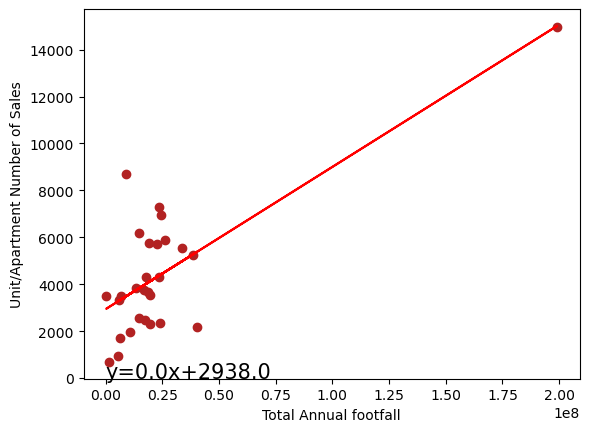

In [14]:
# Filter rows where either 'TotalAnnual' or 'Total Number of Sales' have NaN values
filtered_df = merged_df.dropna(subset=["TotalAnnual", "Unit/Apartment Number of Sales"])

# Create scatter plot
plt.scatter(filtered_df["TotalAnnual"], filtered_df["Unit/Apartment Number of Sales"], color='firebrick')
plt.xlabel("Total Annual footfall")
plt.ylabel("Unit/Apartment Number of Sales")

# Fetch data after filtering NaN values
Total_Annual_Footfall = filtered_df["TotalAnnual"]
Total_Number_sale = filtered_df["Unit/Apartment Number of Sales"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(Total_Annual_Footfall,Total_Number_sale )
regress_value=Total_Annual_Footfall*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(Total_Annual_Footfall,regress_value,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15, color="black")
# Calculate correlation
correlation = st.pearsonr(Total_Annual_Footfall, Total_Number_sale)

print(f"The correlation between total number of Unit/Apartment sales and total foot fall is {round(correlation[0],2)}")
plt.show()


The correlation between total number of House sales and total foot fall is -0.28


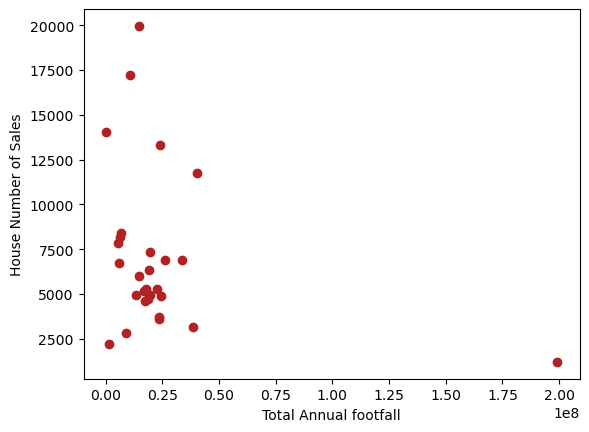

In [15]:
# Filter rows where either 'TotalAnnual' or 'Total Number of Sales' have NaN values
filtered_df = merged_df.dropna(subset=["TotalAnnual", "House Number of Sales"])

# Create scatter plot
plt.scatter(filtered_df["TotalAnnual"], filtered_df["House Number of Sales"], color='firebrick')
plt.xlabel("Total Annual footfall")
plt.ylabel("House Number of Sales")

# Fetch data after filtering NaN values
Total_Annual_Footfall = filtered_df["TotalAnnual"]
Total_Number_sale = filtered_df["House Number of Sales"]

# Calculate correlation
correlation = st.pearsonr(Total_Annual_Footfall, Total_Number_sale)
print(f"The correlation between total number of House sales and total foot fall is {round(correlation[0],2)}")
plt.show()

The correlation between total number of plots sales and total foot fall is -0.09


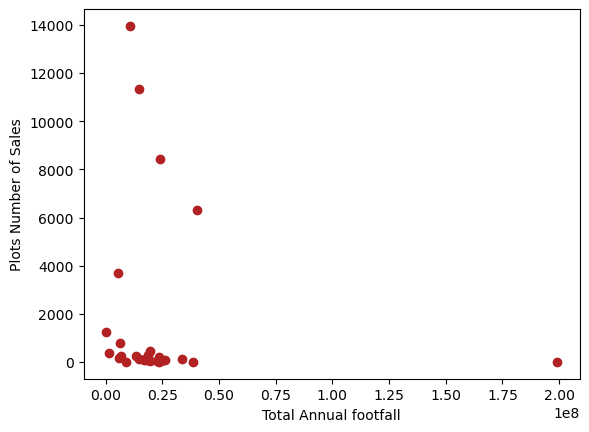

In [16]:
# Filter rows where either 'TotalAnnual' or 'Total Number of Sales' have NaN values
filtered_df = merged_df.dropna(subset=["TotalAnnual", "Vacant House Number of Sales"])

# Create scatter plot
plt.scatter(filtered_df["TotalAnnual"], filtered_df["Vacant House Number of Sales"], color='firebrick')
plt.xlabel("Total Annual footfall")
plt.ylabel("Plots Number of Sales")

# Fetch data after filtering NaN values
Total_Annual_Footfall = filtered_df["TotalAnnual"]
Total_Number_sale = filtered_df["Vacant House Number of Sales"]

# Calculate correlation
correlation = st.pearsonr(Total_Annual_Footfall, Total_Number_sale)
print(f"The correlation between total number of plots sales and total foot fall is {round(correlation[0],2)}")
plt.show()

The correlation between total number of sales and total foot fall is 0.08


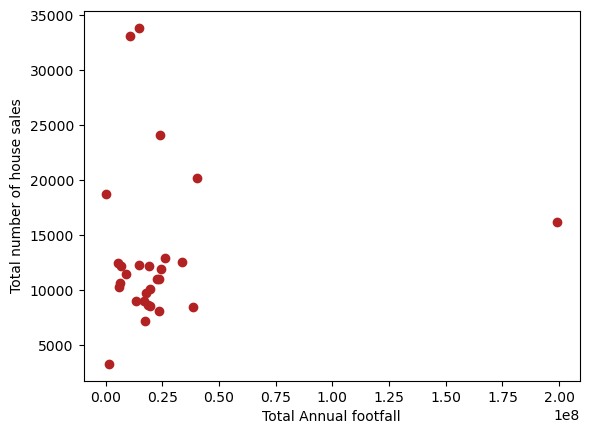

In [17]:
# #Checking if there is any correlation between Total Annual and Total number of sales:

# plt.scatter(merged_df["TotalAnnual"],merged_df["Total Number of Sales"],color='firebrick')
# plt.xlabel("Total Annual footfall")
# plt.ylabel("Total number of house sales")
# Total_Annual_Footfall= merged_df["TotalAnnual"]
# Total_Number_sale=merged_df["Total Number of Sales"]
# correlation=st.pearsonr(Total_Annual_Footfall, Total_Number_sale)
# print(f"The correlation between total number of sales and total foot fall is {round(correlation[0],2)}")
# plt.show()

# Filter rows where either 'TotalAnnual' or 'Total Number of Sales' have NaN values
filtered_df = merged_df.dropna(subset=["TotalAnnual", "Total Number of Sales"])

# Create scatter plot
plt.scatter(filtered_df["TotalAnnual"], filtered_df["Total Number of Sales"], color='firebrick')
plt.xlabel("Total Annual footfall")
plt.ylabel("Total number of house sales")

# Fetch data after filtering NaN values
Total_Annual_Footfall = filtered_df["TotalAnnual"]
Total_Number_sale = filtered_df["Total Number of Sales"]

# Calculate correlation
correlation = st.pearsonr(Total_Annual_Footfall, Total_Number_sale)
print(f"The correlation between total number of sales and total foot fall is {round(correlation[0],2)}")
plt.show()

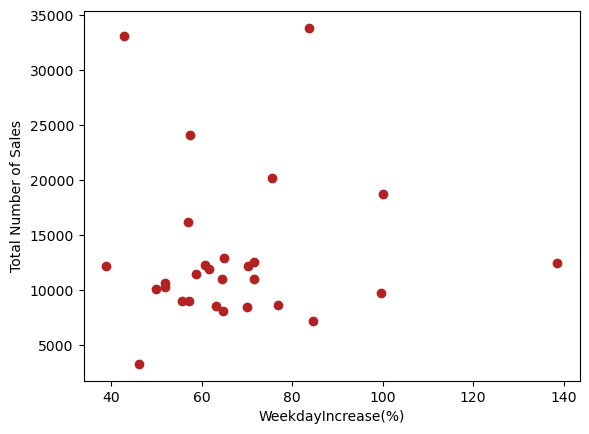

In [18]:
#Checking if there is any correlation between Total Annual and Total number of sales:

plt.scatter(merged_df["WeekdayIncrease(%)"],merged_df["Total Number of Sales"],color='firebrick')
plt.xlabel("WeekdayIncrease(%)")
plt.ylabel("Total Number of Sales")
plt.show()

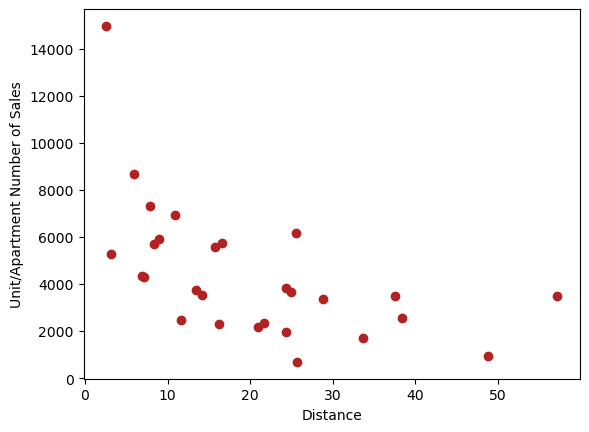

In [19]:
#Checking if there is any correlation between Total Annual and Total number of sales:

plt.scatter(merged_df["Distance"],merged_df["Unit/Apartment Number of Sales"],color='firebrick')
plt.xlabel("Distance")
plt.ylabel("Unit/Apartment Number of Sales")
plt.show()

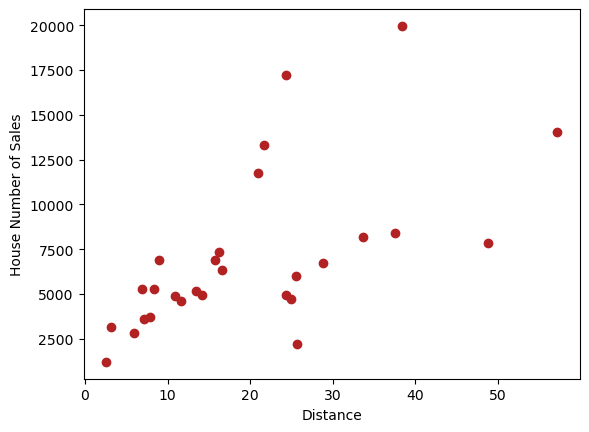

In [20]:
#Checking if there is any correlation between Total Annual and Total number of sales:

plt.scatter(merged_df["Distance"],merged_df["House Number of Sales"],color='firebrick')
plt.xlabel("Distance")
plt.ylabel("House Number of Sales")
plt.show()

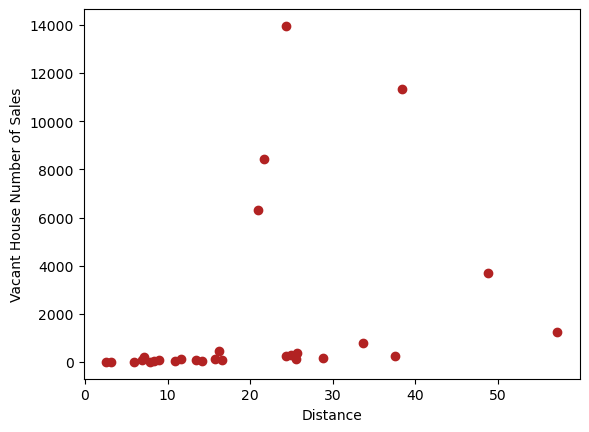

In [21]:
#Checking if there is any correlation between Total Annual and Total number of sales:

plt.scatter(merged_df["Distance"],merged_df["Vacant House Number of Sales"],color='firebrick')
plt.xlabel("Distance")
plt.ylabel("Vacant House Number of Sales")
plt.show()